In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [3]:
file_path = "F:/LPI lessons/archaeology/pre/record_1.xlsx"  
data = pd.read_excel(file_path)

data.head()

,样本号 sample n.,site,district,city,province,样本性质 sample type,源数据（距今）BP,+-,校正后（公元前/公元）cal. BC/AD,%,遗迹性质 feature type,文化/阶段 culture/phase,数据报告 ref. datation report
0,ZK-0999,Xialicheng,Daxing,Beijing,"Hebei (+Beijing, Tianjin)",铁夯锤,1560,60,404AD (93.1%) 610AD\n 618AD ( 2.3%) 640AD,95.4,NaN,辽金时期,放射性碳素测定年代报告(一九) 《考古》92.7
1,ZK-2599,Tashuihe,Lingchuan,Jincheng,Shanxi,骨头,25425,1005,29850BC (95.4%) 25782BC,95.4,NaN,NaN,放射性碳素测定年代报告(一九) \t《考古》92.7
2,ZK-2537,Laoshantou,Kangping,Shenyang,Liaoning,木炭,2360,80,760BC (85.2%) 350BC\n 305BC (10.2%) 208BC,95.4,T ：探方或探沟 square,NaN,放射性碳素测定年代报告(一九) \t《考古》92.7
3,ZK-2538,Laoshantou,Kangping,Shenyang,Liaoning,木炭,2360,80,760BC (85.2%) 350BC\n 305BC (10.2%) 208BC,95.4,T ：探方或探沟 square,NaN,放射性碳素测定年代报告(一九) \t《考古》92.7
4,ZK-2600,Nangangshan,Dantu,Zhenjiang,Jiangsu,木炭,2420,85,786BC (95.4%) 381BC,95.4,M 墓葬 tomb,NaN,放射性碳素测定年代报告(一九) \t《考古》92.7


In [4]:
archa_data = data.copy()

In [5]:
archa_data['原始报告'] = archa_data['数据报告 ref. datation report']

replace_map = {
    ('92.7', '93.7'): '1992-1993',
    ('03.7', '04.7'): '2003-2004',
    ('12.7', '13.7'): '2012-2013',
    ('23.7', '24.7'): '2023-2024'
}

def replace_report_year(value):
    for keys, replacement in replace_map.items():
        if any(k in str(value) for k in keys):
            return replacement
    return value  


archa_data['数据报告 ref. datation report'] = archa_data['数据报告 ref. datation report'].apply(replace_report_year)


In [25]:
archa_data.tail()

,样本号 sample n.,site,district,city,province,样本性质 sample type,源数据（距今）BP,+-,校正后（公元前/公元）cal. BC/AD,%,遗迹性质 feature type,文化/阶段 culture/phase,数据报告 ref. datation report,原始报告
341,ZK-3098,Yingpan,Weili,Bayinguoleng,Xinjiang,芦苇,1774,80,70AD (94.8%) 434AD\n 467AD ( 0.2%) 472AD...,95.4,M 墓葬 tomb,NaN,2003-2004,放射性碳素测定年代报告(二九) \t《考古》03.7
342,ZK-3099,Yingpan,Weili,Bayinguoleng,Xinjiang,芦苇,1764,55,133AD ( 0.5%) 139AD\n 160AD ( 2.5%) 190...,95.4,M 墓葬 tomb,NaN,2003-2004,放射性碳素测定年代报告(二九) \t《考古》03.7
343,ZK-3100,Yingpan,Weili,Bayinguoleng,Xinjiang,木头,2620,55,906BC (80.2%) 746BC\n 690BC ( 4.0%) 664...,95.4,M 墓葬 tomb,NaN,2003-2004,放射性碳素测定年代报告(二九) \t《考古》03.7
344,ZK-3121,Aaigucheng,Kuche,Akesu,Xinjiang,木炭,1337,41,610AD ( 0.7%) 617AD\n 640AD (94.7%) 775AD,95.4,NaN,NaN,2003-2004,放射性碳素测定年代报告(二九) \t《考古》03.7
345,ZK-3122,Langan,Yutian,Hetian,Xinjiang,木炭,1851,38,82AD ( 2.2%) 97AD\n 114AD (88.7%) 252AD...,95.4,NaN,NaN,2003-2004,放射性碳素测定年代报告(二九) \t《考古》03.7


BP Error

In [53]:
mask = ~((archa_data['源数据（距今）BP'].between(20000, 30000)) & (archa_data['+-'].between(600, 1200)))
filtered_data = archa_data[mask]

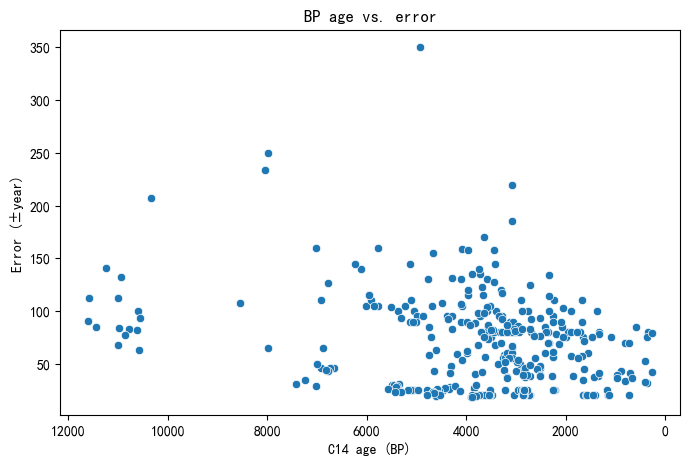

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(filtered_data, x='源数据（距今）BP', y='+-')
plt.title("BP age vs. error")
plt.xlabel("C14 age (BP)")
plt.ylabel("Error (±year)")
plt.gca().invert_xaxis()  
plt.show()


In [56]:
corr, p_value = pearsonr(filtered_data['源数据（距今）BP'], filtered_data['+-'])

print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.238
P-value: 0.000


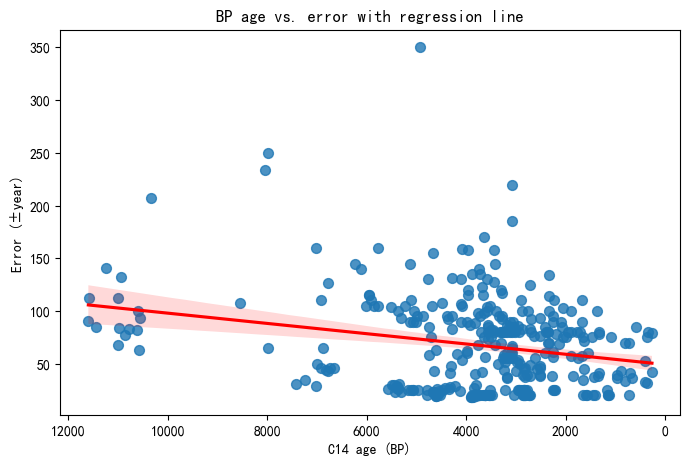

In [57]:
plt.figure(figsize=(8,5))
sns.regplot(data=filtered_data, x='源数据（距今）BP', y='+-', scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title("BP age vs. error with regression line")
plt.xlabel("C14 age (BP)")
plt.ylabel("Error (±year)")
plt.gca().invert_xaxis()
plt.show()

In [59]:

corr_s, p_value_s = spearmanr(filtered_data['源数据（距今）BP'], filtered_data['+-'])
print(f"Spearman correlation coefficient: {corr_s:.3f}")
print(f"P-value: {p_value_s:.3f}")

Spearman correlation coefficient: 0.158
P-value: 0.003


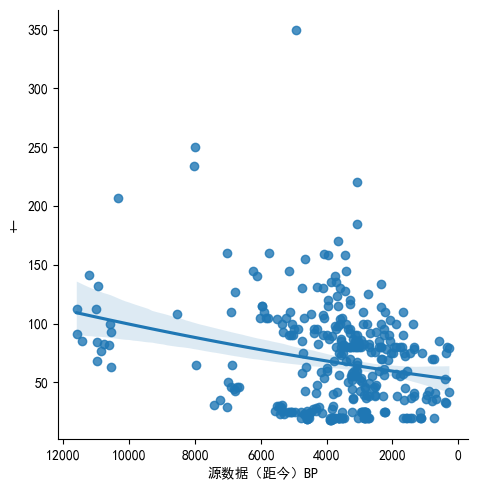

In [60]:
sns.lmplot(data=filtered_data, x='源数据（距今）BP', y='+-', order=2)
plt.gca().invert_xaxis()
plt.show()

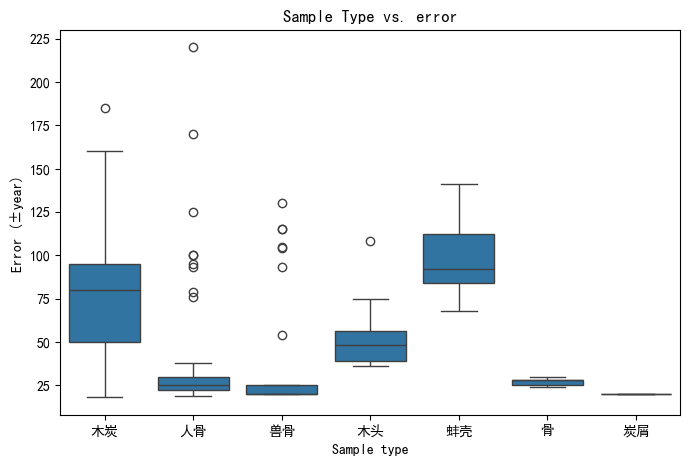

In [10]:
type_counts = archa_data['样本性质 sample type'].value_counts()
valid_types = type_counts[type_counts >= 5].index
filtered_data_sample_type = archa_data[archa_data['样本性质 sample type'].isin(valid_types)]

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_data_sample_type, x='样本性质 sample type', y='+-')

plt.title("Sample Type vs. error")
plt.xlabel("Sample type")
plt.ylabel("Error (±year)")
plt.show()

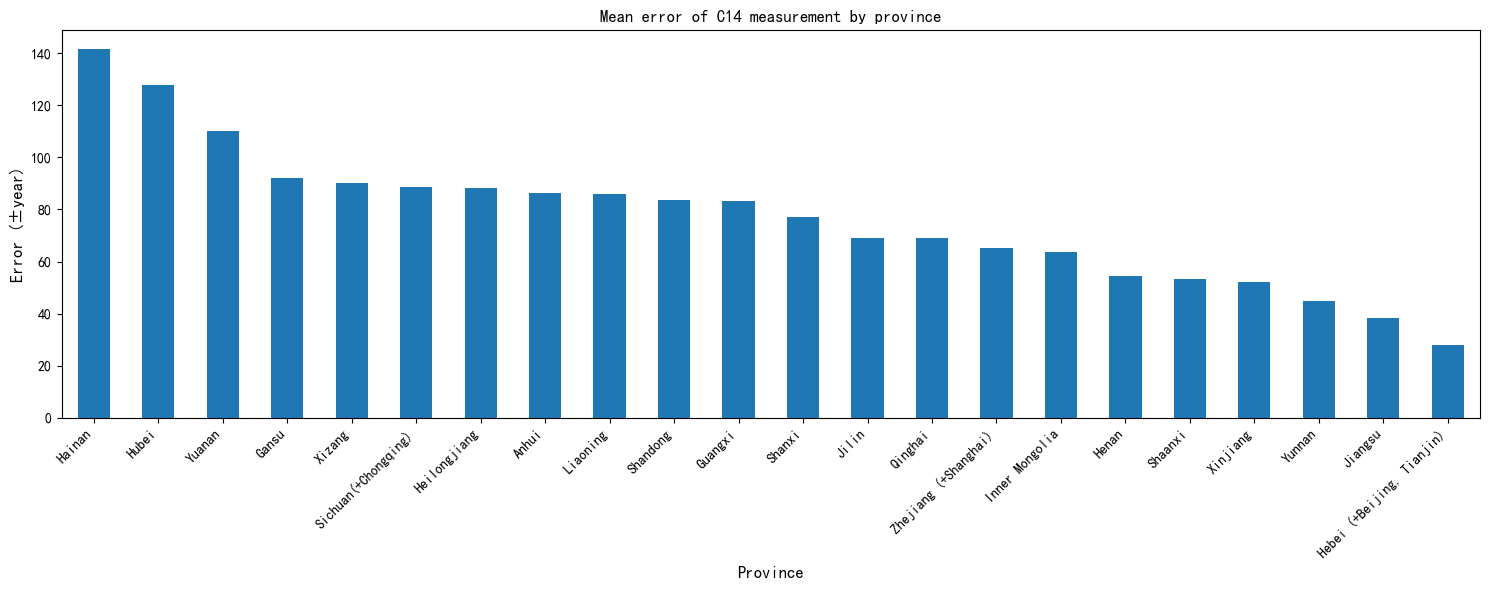

In [35]:
avg_error_pro = archa_data.groupby('province')['+-'].mean().sort_values(ascending=False)
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False

avg_error_pro.plot(kind='bar', figsize=(15, 6), title='Mean error of C14 measurement by province')
plt.ylabel('Error (±year)', fontsize=12)
plt.xlabel('Province', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [87]:
import geopandas as gpd

In [ ]:

china_map = gpd.read_file('F:/LPI lessons/archaeology/pre/gadm41_CHN_shp/gadm41_CHN_1.shp') 

In [ ]:

print(china_map.columns)

print(china_map[['NAME_1', 'geometry']].head())

Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry'],
      dtype='object')
      NAME_1                                           geometry
0      Anhui  POLYGON ((118.71594 31.28814, 118.72051 31.282...
1    Beijing  POLYGON ((116.71038 39.61697, 116.69884 39.617...
2  Chongqing  POLYGON ((108.3877 29.82239, 108.38872 29.8269...
3     Fujian  MULTIPOLYGON (((117.42181 23.56431, 117.42125 ...
4      Gansu  POLYGON ((105.43304 36.32735, 105.43988 36.326...


In [103]:
def expand_province_names(df, province_col, error_col):
    expanded_rows = []
    for _, row in df.iterrows():
        parts = row[province_col].split('/')
        for part in parts:
            match = re.match(r'([^\(\+]+)\s*(?:\(\+?([^\)]+)\))?', part.strip())
            if match:
                main_prov = match.group(1).strip()
                sub_provs = match.group(2)
                expanded_rows.append({'NAME_1': main_prov, 'mean_error': row[error_col]})
                if sub_provs:
                    for sub_p in sub_provs.split(','):
                        expanded_rows.append({'NAME_1': sub_p.strip(), 'mean_error': row[error_col]})
            else:
                expanded_rows.append({'NAME_1': part.strip(), 'mean_error': row[error_col]})
    return pd.DataFrame(expanded_rows)


In [ ]:
avg_error_pro_raw = archa_data.groupby('province')['+-'].mean().reset_index()


avg_error_pro_map = expand_province_names(avg_error_pro_raw, 'province', '+-')


avg_error_pro_map = avg_error_pro_map.groupby('NAME_1')['mean_error'].mean().reset_index()

name_map = {
    'Inner Mongolia': 'Nei Mongol',
    'Xinjiang': 'Xinjiang Uygur',

}


avg_error_pro_map['NAME_1_mapped'] = avg_error_pro_map['NAME_1'].map(name_map).fillna(avg_error_pro_map['NAME_1'])


map_with_data = china_map.merge(avg_error_pro_map, left_on='NAME_1', right_on='NAME_1_mapped', how='left')

<Figure size 1200x1000 with 0 Axes>

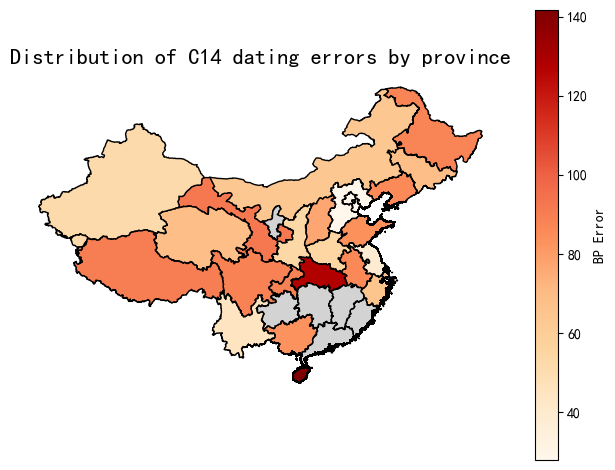

In [ ]:
plt.figure(figsize=(12, 10))
map_with_data.plot(
    column='mean_error',
    cmap='OrRd',
    legend=True,
    legend_kwds={'label': "BP Error"},
    edgecolor='black',
    missing_kwds={
        "color": "lightgrey", 
        "label": "Null"       
    }
)
plt.title('Distribution of C14 dating errors by province', fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

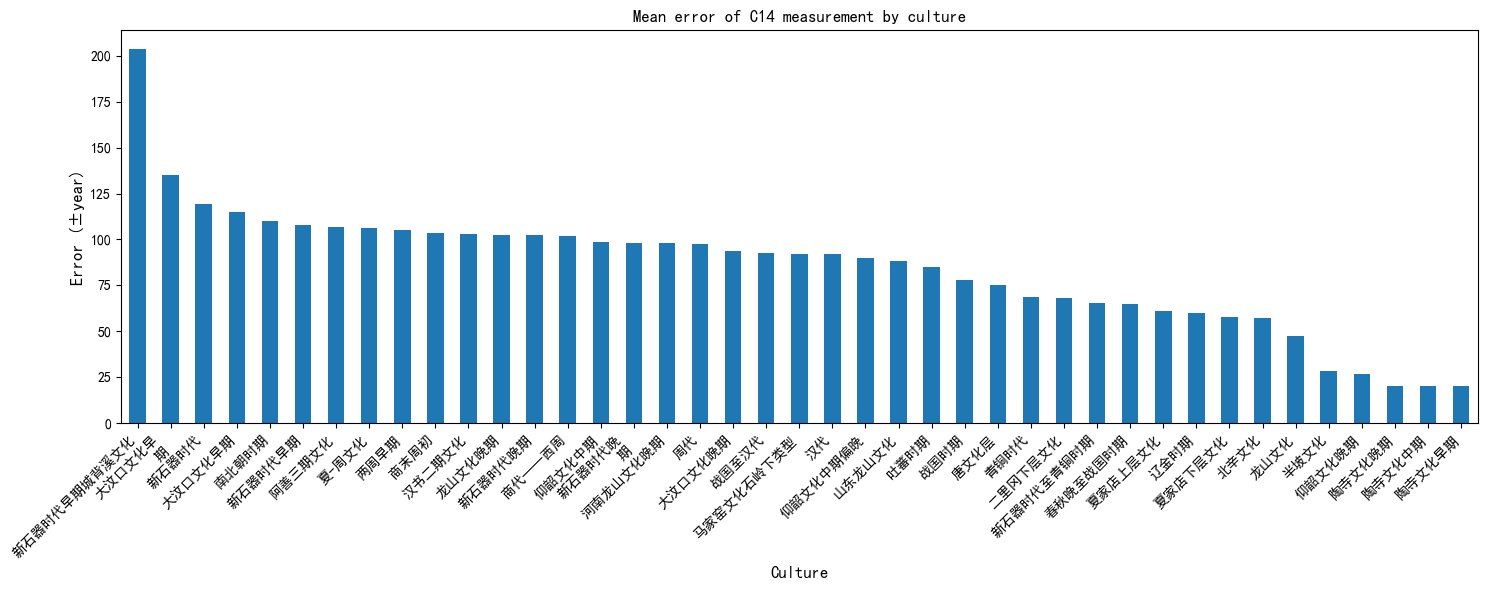

In [36]:
avg_error = archa_data.groupby('文化/阶段 culture/phase')['+-'].mean().sort_values(ascending=False)
plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False

avg_error.plot(kind='bar', figsize=(15, 6), title='Mean error of C14 measurement by culture')
plt.ylabel('Error (±year)', fontsize=12)
plt.xlabel('Culture', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

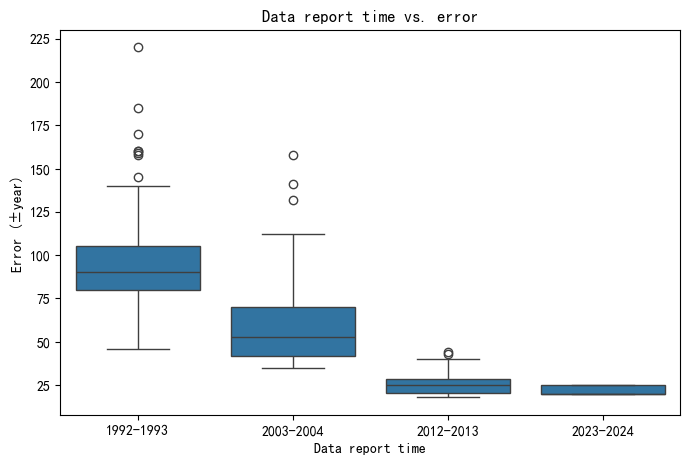

In [28]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered_data_sample_type, x='数据报告 ref. datation report', y='+-')

plt.title("Data report time vs. error")
plt.xlabel("Data report time")
plt.ylabel("Error (±year)")
plt.show()

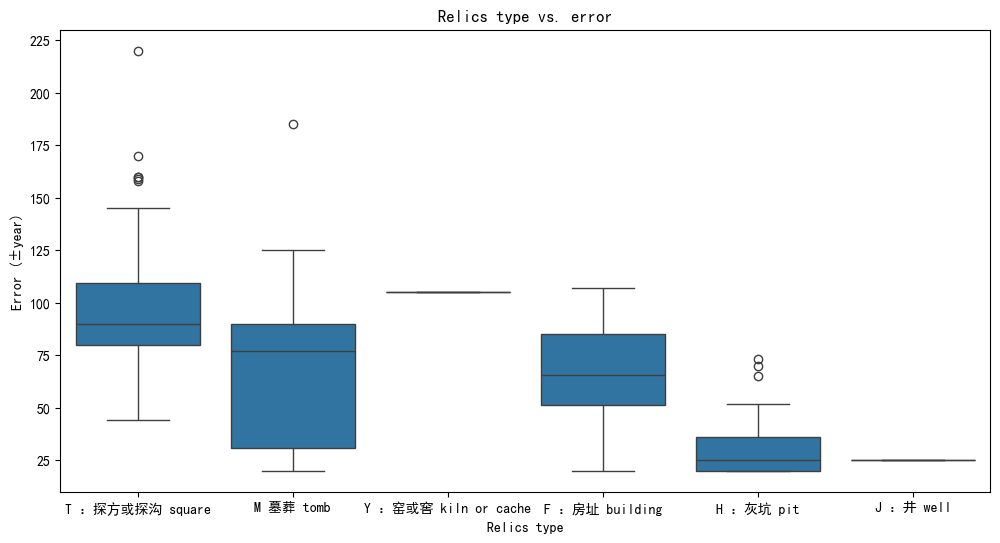

In [33]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data_sample_type, x='遗迹性质 feature type', y='+-')

plt.title("Relics type vs. error")
plt.xlabel("Relics type")
plt.ylabel("Error (±year)")
plt.show()

In [7]:
C14_BPerror = archa_data.copy()

In [8]:
sample_type_counts = C14_BPerror['样本性质 sample type'].value_counts()
C14_BPerror['样本性质 sample type'] = C14_BPerror['样本性质 sample type'].apply(
    lambda x: x if sample_type_counts.get(x, 0) >= 5 else '其他'
)


feature_type_counts = C14_BPerror['遗迹性质 feature type'].value_counts()
C14_BPerror['遗迹性质 feature type'] = C14_BPerror['遗迹性质 feature type'].apply(
    lambda x: x if feature_type_counts.get(x, 0) >= 5 else '其他'
)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
features = ['样本性质 sample type', '遗迹性质 feature type', 'province', '文化/阶段 culture/phase','数据报告 ref. datation report']
target = '+-'

BPerror_model = C14_BPerror.dropna(subset=[target])

X = pd.get_dummies(BPerror_model[features], drop_first=True)
X['BP'] = BPerror_model['源数据（距今）BP']
scaler = StandardScaler()
X[['BP']] = scaler.fit_transform(X[['BP']])
y = BPerror_model[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression:
MAE: 22.929014375198854
R^2: 0.0887166133171422


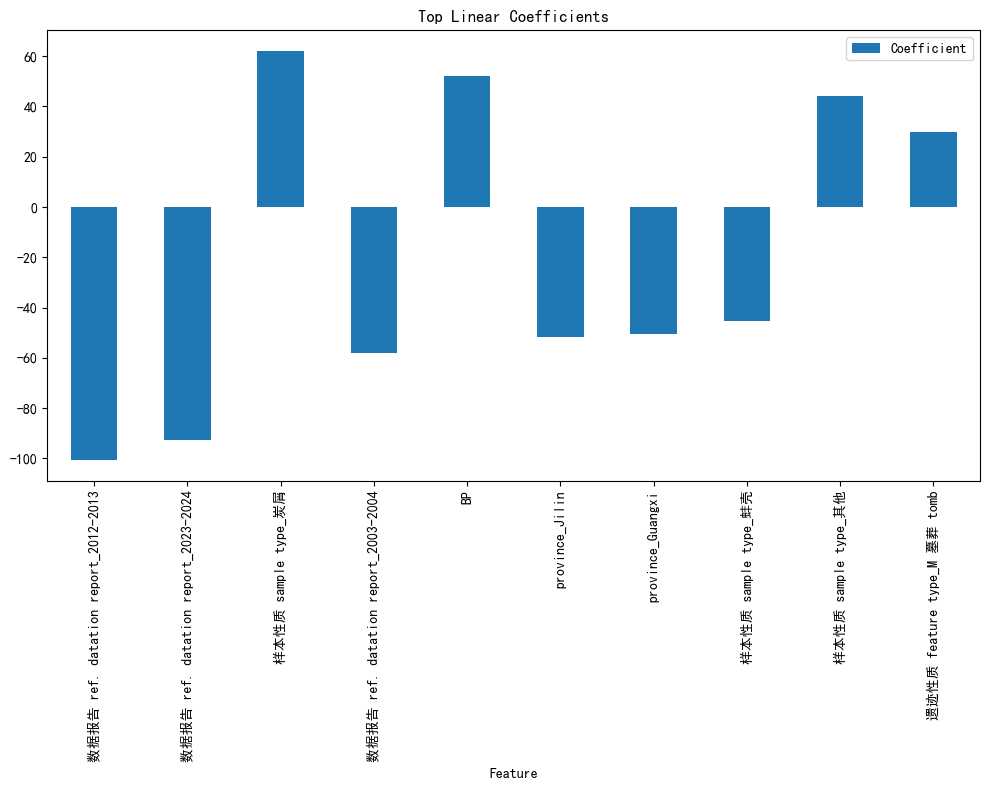

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R^2:", r2_score(y_test, y_pred_lr))


coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr.coef_})
coeff_df.sort_values('Coefficient', key=abs, ascending=False).head(10).plot(
    kind='bar', x='Feature', y='Coefficient', title="Top Linear Coefficients", figsize=(10, 8))
plt.tight_layout()
plt.show()

Random Forest:
MAE: 16.54814285714286
R^2: 0.4508897384454773


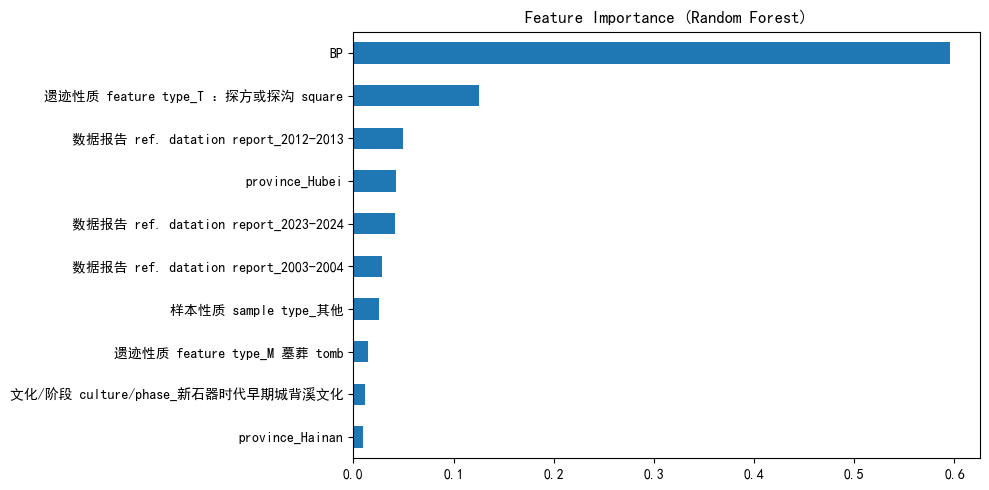

In [12]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


print("Random Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R^2:", r2_score(y_test, y_pred_rf))

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh', title='Feature Importance (Random Forest)', figsize=(10, 5))
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [13]:
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)

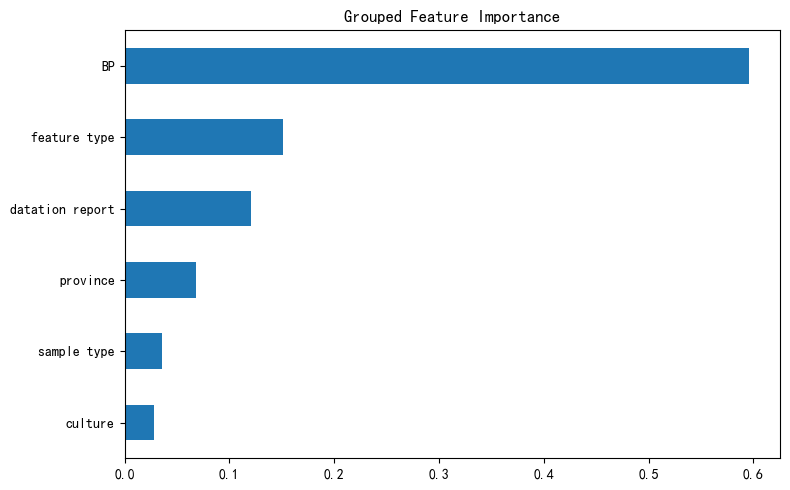

In [ ]:
def extract_group(colname):
    if '样本性质 sample type' in colname:
        return 'sample type'
    elif '遗迹性质 feature type' in colname:
        return 'feature type'
    elif 'province' in colname:
        return 'province'
    elif '数据报告 ref. datation report' in colname:
        return 'datation report'
    elif '文化/阶段 culture/phase' in colname:
        return 'culture'
    elif colname == 'BP' or '源数据（距今）BP' in colname:
        return 'BP'
    else:
        return 'Else'


grouped_importance = feature_importance.groupby(by=feature_importance.index.map(extract_group)).sum()


grouped_importance.sort_values(ascending=False).plot(kind='barh', title='Grouped Feature Importance', figsize=(8,5))
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [2]:
import xgboost as xgb
import shap

In [42]:
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)


print("XGBoost Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("R^2:", r2_score(y_test, y_pred_xgb))


XGBoost Regression:
MAE: 17.552397782461984
R^2: 0.42737187392934783


In [16]:
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show

In [17]:
ebm = ExplainableBoostingRegressor(random_state=42)
ebm.fit(X_train, y_train)

y_pred_ebm = ebm.predict(X_test)
print("EBM:")
print("MAE:", mean_absolute_error(y_test, y_pred_ebm))
print("R^2:", r2_score(y_test, y_pred_ebm))


show(ebm.explain_global())

EBM:
MAE: 17.444434603293036
R^2: 0.4539301508186987


<!-- http://127.0.0.1:7001/1494486712000/ -->

In [ ]:
global_exp = ebm.explain_global()

feature_names = global_exp.data()['names']
importance_values = global_exp.data()['scores']

ebm_importance = pd.Series(importance_values, index=feature_names)

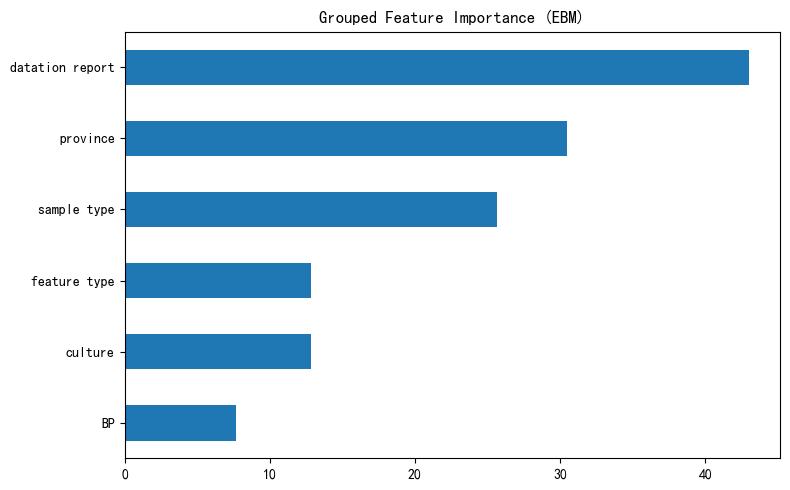

In [ ]:
def extract_group(colname):
    if '样本性质 sample type' in colname:
        return 'sample type'
    elif '遗迹性质 feature type' in colname:
        return 'feature type'
    elif 'province' in colname:
        return 'province'
    elif '数据报告 ref. datation report' in colname:
        return 'datation report'
    elif '文化/阶段 culture/phase' in colname:
        return 'culture'
    elif colname == 'BP' or '源数据（距今）BP' in colname:
        return 'BP'
    else:
        return 'Else'


grouped_importance = ebm_importance.groupby(ebm_importance.index.map(extract_group)).sum()

import matplotlib.pyplot as plt
grouped_importance.sort_values(ascending=True).plot(kind='barh', figsize=(8,5), title="Grouped Feature Importance (EBM)")
plt.tight_layout()
plt.show()

Prob

In [20]:
C14_Prob = archa_data.copy()

In [21]:
import re
import numpy as np
from scipy.stats import pearsonr


In [ ]:
def extract_max_prob(text):
    if pd.isna(text):
        return np.nan
    
    matches = re.findall(r'\(\s*([\d.]+)\s*%\s*\)', text)
    if not matches:
        return np.nan
   
    probs = [float(m) for m in matches]
    return max(probs)


C14_Prob['main_prob'] = C14_Prob['校正后（公元前/公元）cal. BC/AD'].apply(extract_max_prob)

In [23]:
C14_Prob.head()

,样本号 sample n.,site,district,city,province,样本性质 sample type,源数据（距今）BP,+-,校正后（公元前/公元）cal. BC/AD,%,遗迹性质 feature type,文化/阶段 culture/phase,数据报告 ref. datation report,原始报告,main_prob
0,ZK-0999,Xialicheng,Daxing,Beijing,"Hebei (+Beijing, Tianjin)",铁夯锤,1560,60,404AD (93.1%) 610AD\n 618AD ( 2.3%) 640AD,95.4,NaN,辽金时期,1992-1993,放射性碳素测定年代报告(一九) 《考古》92.7,93.1
1,ZK-2599,Tashuihe,Lingchuan,Jincheng,Shanxi,骨头,25425,1005,29850BC (95.4%) 25782BC,95.4,NaN,NaN,1992-1993,放射性碳素测定年代报告(一九) \t《考古》92.7,95.4
2,ZK-2537,Laoshantou,Kangping,Shenyang,Liaoning,木炭,2360,80,760BC (85.2%) 350BC\n 305BC (10.2%) 208BC,95.4,T ：探方或探沟 square,NaN,1992-1993,放射性碳素测定年代报告(一九) \t《考古》92.7,85.2
3,ZK-2538,Laoshantou,Kangping,Shenyang,Liaoning,木炭,2360,80,760BC (85.2%) 350BC\n 305BC (10.2%) 208BC,95.4,T ：探方或探沟 square,NaN,1992-1993,放射性碳素测定年代报告(一九) \t《考古》92.7,85.2
4,ZK-2600,Nangangshan,Dantu,Zhenjiang,Jiangsu,木炭,2420,85,786BC (95.4%) 381BC,95.4,M 墓葬 tomb,NaN,1992-1993,放射性碳素测定年代报告(一九) \t《考古》92.7,95.4


In [24]:
mask = ~((C14_Prob['源数据（距今）BP'].between(20000, 30000)) & (C14_Prob['+-'].between(600, 1200)))
filtered_data_C14 = C14_Prob[mask]

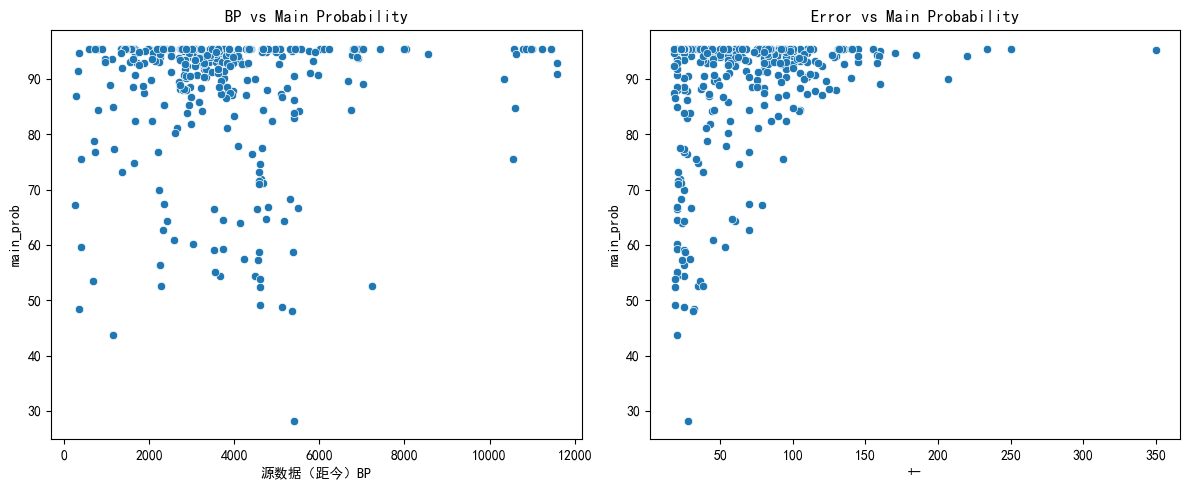

BP vs Main Prob: r=0.048, p=0.375
Error vs Main Prob: r=0.348, p=0.000


In [ ]:

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=filtered_data_C14, x='源数据（距今）BP', y='main_prob')
plt.title('BP vs Main Probability')

plt.subplot(1, 2, 2)
sns.scatterplot(data=filtered_data_C14, x='+-', y='main_prob')
plt.title('Error vs Main Probability')

plt.tight_layout()
plt.show()

# 相关系数
r_bp, p_bp = pearsonr(filtered_data_C14['源数据（距今）BP'], filtered_data_C14['main_prob'])
r_err, p_err = pearsonr(filtered_data_C14['+-'], filtered_data_C14['main_prob'])

print(f"BP vs Main Prob: r={r_bp:.3f}, p={p_bp:.3f}")
print(f"Error vs Main Prob: r={r_err:.3f}, p={p_err:.3f}")

In [ ]:

r_bp, p_bp = spearmanr(filtered_data_C14['源数据（距今）BP'], filtered_data_C14['main_prob'])
r_err, p_err = spearmanr(filtered_data_C14['+-'], filtered_data_C14['main_prob'])

print(f"BP vs Main Prob: r={r_bp:.3f}, p={p_bp:.3f}")
print(f"Error vs Main Prob: r={r_err:.3f}, p={p_err:.3f}")

BP vs Main Prob: r=0.029, p=0.589
Error vs Main Prob: r=0.241, p=0.000


In [27]:
import statsmodels.api as sm

In [29]:
X = filtered_data_C14[['源数据（距今）BP', '+-']]
X = sm.add_constant(X)
y = filtered_data_C14['main_prob']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              main_prob   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     23.88
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           1.97e-10
Time:                        22:42:46   Log-Likelihood:                -1327.4
No. Observations:                 345   AIC:                             2661.
Df Residuals:                     342   BIC:                             2672.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.9434      1.444     56.742      0.0

In [ ]:
filtered_data_C14['bp_bin'] = pd.cut(filtered_data_C14['源数据（距今）BP'], bins=[0, 2000, 4000, 6000, 8000, 10000, 30000], right=False)
sns.boxplot(data=filtered_data_C14, x='bp_bin', y='main_prob')
plt.xticks(rotation=45)
plt.title('Main Probability across BP bins')
plt.show()

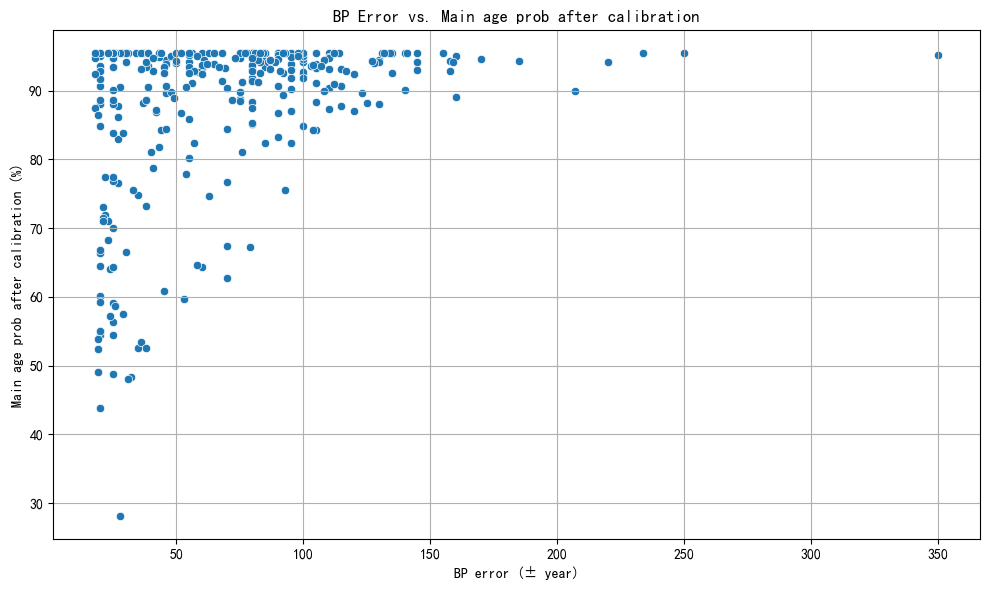

In [75]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False


plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data_C14, x='+-', y='main_prob')
plt.title("BP Error vs. Main age prob after calibration")
plt.xlabel("BP error (± year)")
plt.ylabel("Main age prob after calibration (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [76]:
df_valid = C14_Prob[['+-', 'main_prob']].dropna()
corr, pval = pearsonr(df_valid['+-'], df_valid['main_prob'])

print(f"Pearson correlation coefficient: {corr:.3f}, P value: {pval:.3f}")

Pearson correlation coefficient: 0.253, P value: 0.000


In [77]:
corr_s, p_value_s = spearmanr(df_valid['+-'], df_valid['main_prob'])

print(f"Spearman correlation coefficient: {corr_s:.3f}")
print(f"P-value: {p_value_s:.3f}")

Spearman correlation coefficient: 0.246
P-value: 0.000


In [78]:
import statsmodels.api as sm

In [ ]:
X = C14_Prob[['源数据（距今）BP', '+-']]
X = sm.add_constant(X)


y = C14_Prob['main_prob']


model = sm.OLS(y, X).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              main_prob   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     12.98
Date:                Sat, 31 May 2025   Prob (F-statistic):           3.68e-06
Time:                        22:42:27   Log-Likelihood:                -1341.0
No. Observations:                 346   AIC:                             2688.
Df Residuals:                     343   BIC:                             2699.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.7971      1.203     71.298      0.0

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
X = C14_Prob[['源数据（距今）BP', '+-']]
y = C14_Prob['main_prob']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


y_pred = poly_model.predict(X_test_poly)


print("Polynomial R²:", r2_score(y_test, y_pred))
print("Polynomial RMSE:", mean_squared_error(y_test, y_pred, squared=False))

Polynomial R²: 0.026039828310287616
Polynomial RMSE: 9.70633547551744


In [ ]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)


print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))


importances = rf.feature_importances_
for feat, score in zip(X.columns, importances):
    print(f"{feat}: {score:.4f}")

Random Forest R²: 0.04460687647794748
Random Forest RMSE: 9.613372136917246
源数据（距今）BP: 0.5989
+-: 0.4011


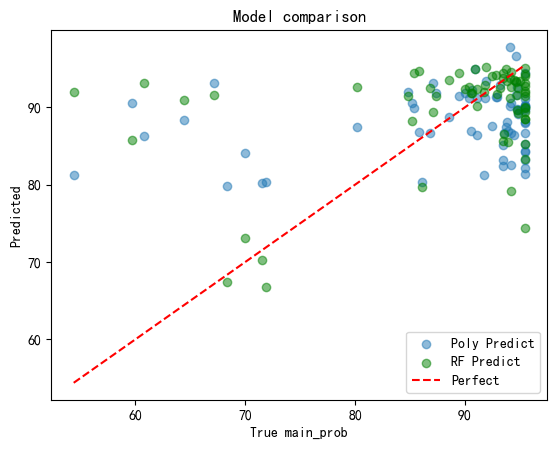

In [85]:
plt.scatter(y_test, y_pred, alpha=0.5, label='Poly Predict')
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='RF Predict', color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect')
plt.xlabel("True main_prob")
plt.ylabel("Predicted")
plt.legend()
plt.title("Model comparison")
plt.show()

d:\python\python3\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.

d:\python\python3\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.

d:\python\python3\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.

d:\python\python3\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.

d:\python\python3\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



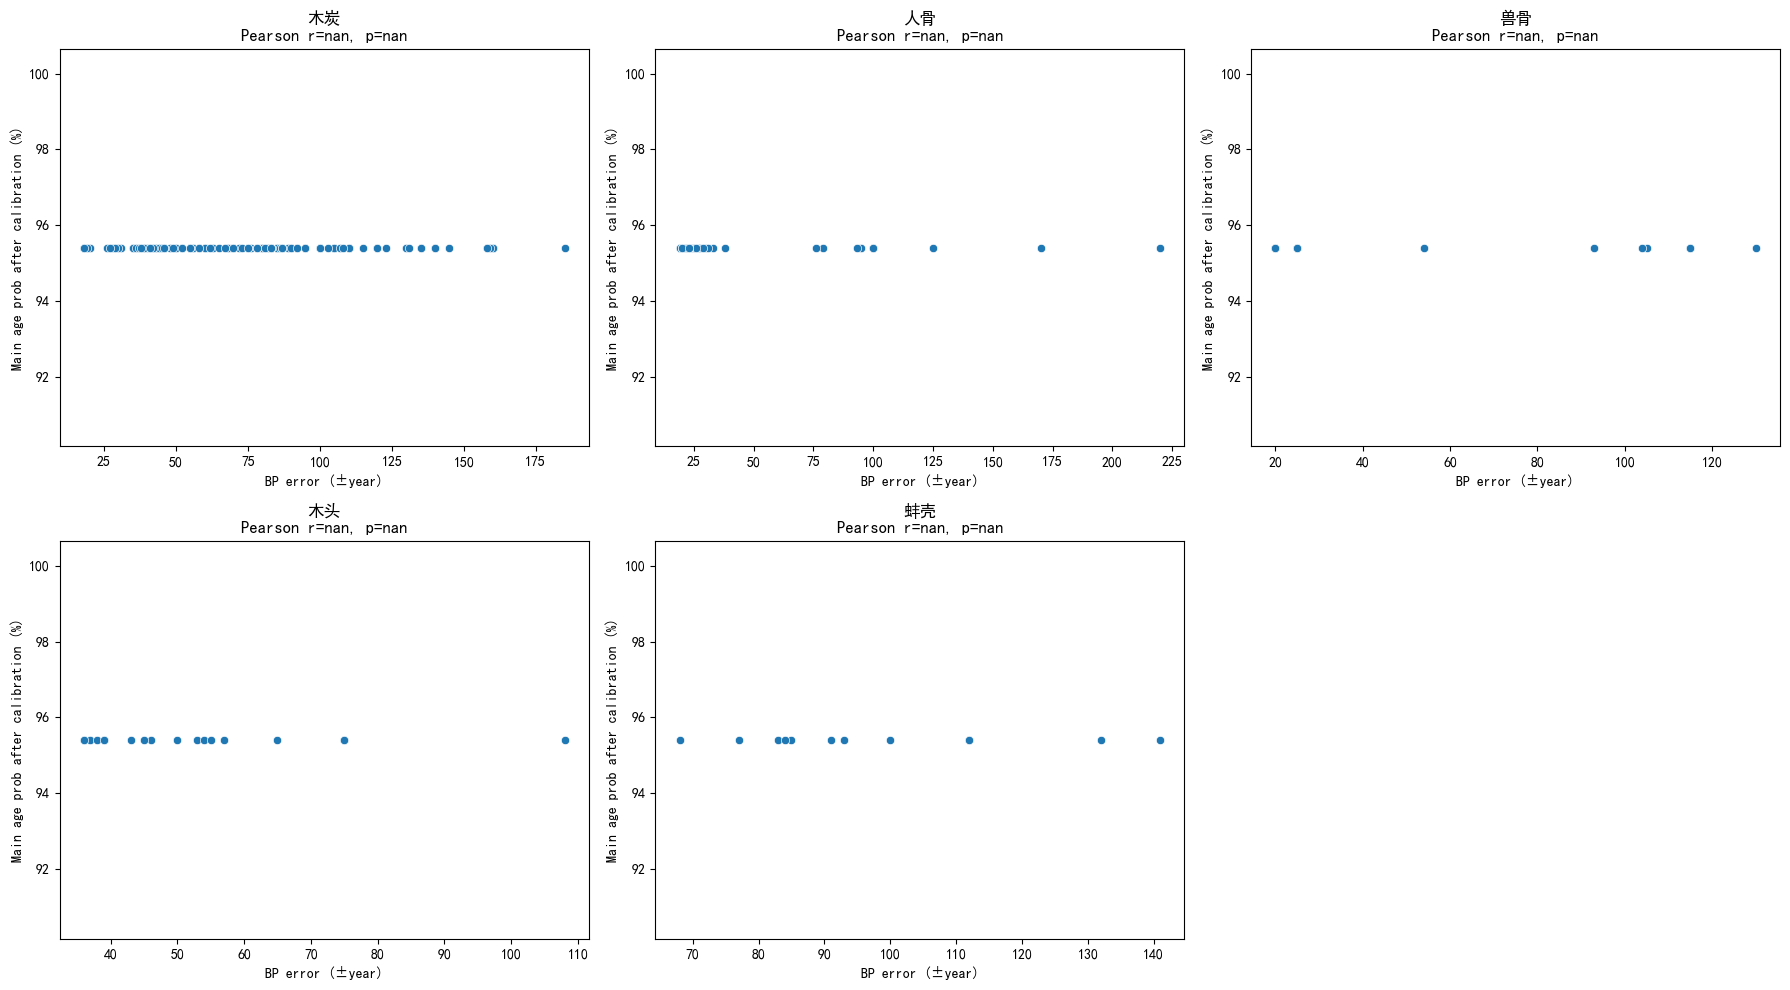

In [ ]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


C14_Prob_sample = C14_Prob[['样本性质 sample type', '+-', '%']].dropna()


valid_types = C14_Prob_sample['样本性质 sample type'].value_counts()
valid_types = valid_types[valid_types > 5].index


n_cols = 3
n_rows = (len(valid_types) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))
axes = axes.flatten()


for i, sample_type in enumerate(valid_types):
    sub_df = C14_Prob_sample[C14_Prob_sample['样本性质 sample type'] == sample_type]
    ax = axes[i]
    sns.scatterplot(data=sub_df, x='+-', y='%', ax=ax)
    
    
    r, p = pearsonr(sub_df['+-'], sub_df['%'])
    ax.set_title(f"{sample_type}\nPearson r={r:.2f}, p={p:.3f}")
    ax.set_xlabel("BP error (±year)")
    ax.set_ylabel("Main age prob after calibration (%)")


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\z\AppData\Local\Temp\ipykernel_6824\2014691043.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

d:\python\python3\Lib\site-packages\scipy\stats\_stats_py.py:4781: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



ValueError: x and y must have length at least 2.

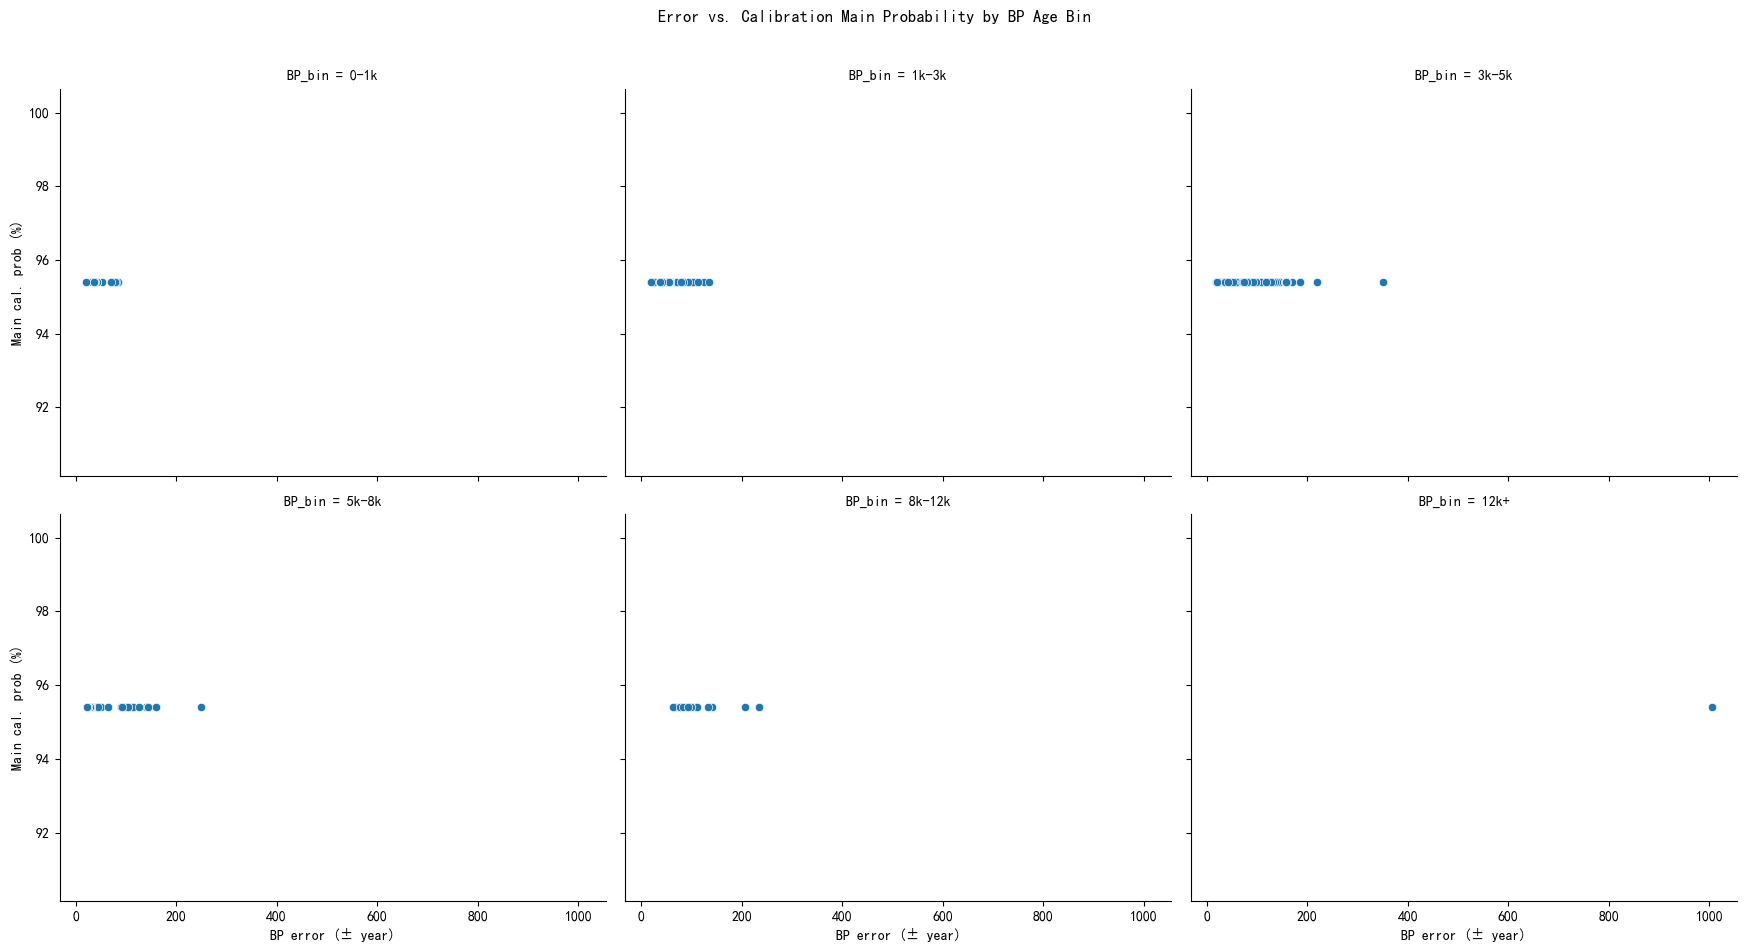

In [ ]:
bins = [0, 1000, 3000, 5000, 8000, 12000, 30000]
labels = ['0-1k', '1k-3k', '3k-5k', '5k-8k', '8k-12k', '12k+', '12k+']
C14_Prob['BP_bin'] = pd.cut(C14_Prob['源数据（距今）BP'], bins=bins, labels=labels[:-1], right=False)
# C14_Prob.loc[C14_Prob['源数据（距今）BP'] >= 12000, 'BP_bin'] = '12k+'


g = sns.FacetGrid(C14_Prob, col='BP_bin', col_wrap=3, height=4.5, aspect=1.3)
g.map_dataframe(sns.scatterplot, x='+-', y='%')


g.set_axis_labels("BP error (± year)", "Main cal. prob (%)")
g.fig.suptitle("Error vs. Calibration Main Probability by BP Age Bin", y=1.05)


correlations = C14_Prob.groupby('BP_bin').apply(lambda df: pearsonr(df['+-'], df['%'])[0])
correlations = correlations.round(3)

correlations
